In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
url = ('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv')

In [50]:
#a  - Importe os dados em notebook e atribua à variável chipo.

chipo = pd.read_table(url)  

In [51]:
#b - Selecione e mostre as 10 primeiras entradas.

chipo[0:10] 

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [52]:
#c - Quantas observações estão presentes neste DataSet?
chipo.shape


(4622, 5)

In [53]:
#d - Qual o número de colunas neste DataSet?

chipo.shape[1]


5

In [54]:
#e - Qual o nome de todas as colunas deste DataSet?

chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [55]:
#f - Qual o produto mais pedido? Quantas vezes ele foi pedido?
chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False)

item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chips and Tomatillo Red Chili Salsa       50


In [56]:
#g - Qual foi o pedido mais pedido dentro da coluna choice_description?
 #Tirando os valores nulos de choice description:
chipo_not_null = chipo[chipo['choice_description'].notnull()]
chipo_not_null



,order_id,quantity,item_name,choice_description,item_price
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [57]:
 #arrumando os elementos de choice description e contando os elementos em um novo dataframe:

cd_modificado = []
for i in chipo_not_null['choice_description']:
    i = i.replace('[','')
    i = i.replace(']','')
    i = i.split(',')
    for d in i:
        d = d.strip().lower()
        cd_modificado.append(d)
cd_df = pd.DataFrame(cd_modificado)
cd_df[0:5]
cd_df.groupby(0)[0].count().sort_values(ascending = False)


0
rice                                    2389
cheese                                  2281
lettuce                                 1742
sour cream                              1711
black beans                             1342
fresh tomato salsa                      1046
guacamole                               1037
fajita vegetables                        722
pinto beans                              582
roasted chili corn salsa                 457
fresh tomato salsa (mild)                351
tomatillo red chili salsa                325
fajita veggies                           302
roasted chili corn salsa (medium)        270
tomatillo-red chili salsa (hot)          259
tomatillo green chili salsa              230
diet coke                                134
tomatillo-green chili salsa (medium)     128
coke                                     123
sprite                                    77
lemonade                                  33
fresh tomato (mild)                       31
coca col

In [58]:
#h - Quantos itens foram pedidos no total?

chipo['quantity'].sum()

4972

In [59]:
chipo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [60]:
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

In [61]:
#i - Qual foi o valor recebido para o período representado nessa base de dados?

chipo['item_price'].sum()

34500.16

In [62]:
#j - Qual a média do valor recebido por pedido?
media_pedido = chipo.groupby('order_id')['item_price'].mean()

media_pedido.mean()

7.841910975496616

In [63]:
#l - Quantos produtos custam mais de $10?
#Vendo o preço unitário do item pedido
chipo = chipo.assign(unidade_item_price = lambda x : x['item_price'] / x['quantity'])



In [64]:
#Atribuindo uma nova variavel com itens acima de 10:
chipo_10 = chipo[chipo['unidade_item_price'] > 10][['item_name','unidade_item_price']]
chipo_10['unidade_item_price'].count()


1034

In [65]:
#m - Qual o preço para cada um deles?

chipo_10

,item_name,unidade_item_price
5,Chicken Bowl,10.98
7,Steak Burrito,11.75
13,Chicken Bowl,11.25
23,Chicken Burrito,10.98
39,Barbacoa Bowl,11.75
...,...,...
4610,Steak Burrito,11.75
4611,Veggie Burrito,11.25
4617,Steak Burrito,11.75
4618,Steak Burrito,11.75


In [66]:
#n - Ordene os itens que custam mais de $10 por ordem alfabética.

chipo_10.sort_values(by= 'item_name', ascending= False)

,item_name,unidade_item_price
1699,Veggie Soft Tacos,11.25
738,Veggie Soft Tacos,11.25
2156,Veggie Salad Bowl,11.25
295,Veggie Salad Bowl,11.25
186,Veggie Salad Bowl,11.25
...,...,...
4140,Barbacoa Bowl,11.75
919,Barbacoa Bowl,11.75
4485,Barbacoa Bowl,11.75
3017,Barbacoa Bowl,11.75


In [67]:
#o - Quantas vezes o item mais caro foi pedido?

item_mais_caro = chipo_10[chipo_10['unidade_item_price'] == chipo_10['unidade_item_price'].max()]['item_name'].iloc[0]

# Conte quantas vezes o item mais caro foi pedido em chipo
quantidade_item_mais_caro = len(chipo[chipo['item_name'] == item_mais_caro])
quantidade_item_mais_caro




29

In [68]:
#p - Quantas vezes uma Veggie Salad Bowl foi pedida?

chipo[chipo['item_name'] == 'Veggie Salad Bowl']['item_name'].count()

18

In [69]:
#q - Crie um histograma com os 5 produtos mais pedidos.
hist_5_maispedidos = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending= False).head()
hist_5_maispedidos

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


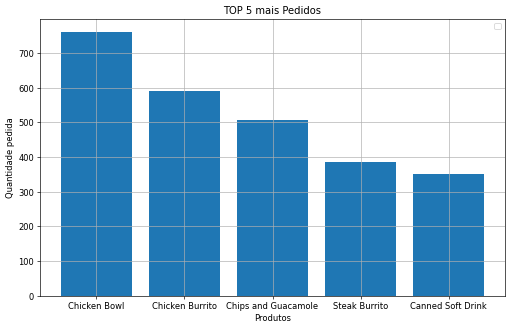

In [70]:
plt.figure(figsize=(10,6), dpi=60)
plt.bar(hist_5_maispedidos.index, hist_5_maispedidos.values)
plt.xlabel('Produtos')
plt.ylabel('Quantidade pedida')
plt.title('TOP 5 mais Pedidos')
plt.legend()
plt.grid(True)
plt.show()

In [72]:
#r - Crie um gráfico de espalhamento onde em um eixo está o número de vezes que um pedido foi realizado e no outro eixo está o preço do produto.
 #vamos pegar a media do valor do item, pois alguns itens estao com valores diferentes:
chipo_mod = chipo.groupby('item_name').agg({'quantity':'count', 'item_price':'mean' })
chipo_mod.head()
 
 

,quantity,item_price
item_name,,
6 Pack Soft Drink,54,6.610185
Barbacoa Bowl,66,10.187273
Barbacoa Burrito,91,9.832418
Barbacoa Crispy Tacos,11,10.928182
Barbacoa Salad Bowl,10,10.640000


<Axes: xlabel='quantity', ylabel='item_price'>

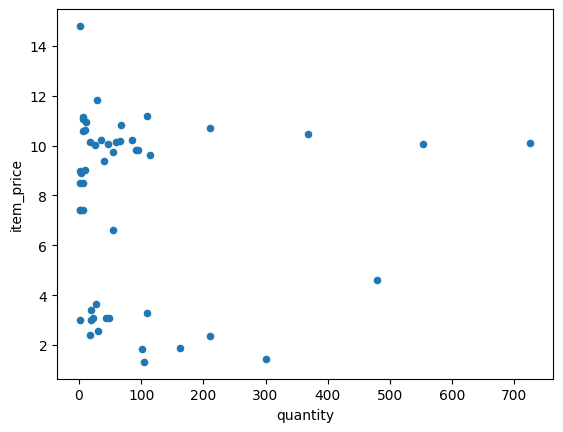

In [73]:
chipo_mod.plot(kind='scatter',y='item_price',x='quantity')

In [74]:
#s - Baseado no gráfico gerado, os dois eixos estão correlacionados? Justifique.
chipo_mod.corr()

,quantity,item_price
quantity,1.000000,-0.024968
item_price,-0.024968,1.000000


Resposta da S:
Não está correlacionado linearmente dado o baixo valor de -0.024. Indica que não correlação linear.